In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [20]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [21]:
ratings.shape

(100836, 4)

In [22]:
movies.shape

(9742, 3)

In [23]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [24]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [25]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [26]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [27]:
ratings.head(500)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
495,4,4034,5.0,986848753
496,4,4074,3.0,986848665
497,4,4121,4.0,986934901
498,4,4144,3.0,986848685


In [28]:
movies.head(500)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
495,573,"Ciao, Professore! (Io speriamo che me la cavo)...",Drama
496,574,Spanking the Monkey (1994),Comedy|Drama
497,575,"Little Rascals, The (1994)",Children|Comedy
498,577,Andre (1994),Adventure|Children|Drama


In [29]:
rating = pd.merge(movies, ratings).drop(['genres', 'timestamp'], axis=1)
rating.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [30]:
user_ratings = rating.pivot_table(index=['userId'], columns=['title'], values='rating')
user_ratings = user_ratings.dropna(thresh=10, axis=1)
user_ratings = user_ratings.fillna(0)
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
item_similarity_df = user_ratings.corr(method='pearson')
print("\nItem Similarity Matrix:")
item_similarity_df.head(10)


Item Similarity Matrix:


title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
101 Dalmatians (1996),0.087931,0.148903,0.006139,0.223481,0.234459,1.000000,0.285112,0.119843,0.072399,0.029967,...,0.114968,0.077232,0.096294,0.067134,0.113224,0.184324,0.054024,0.047804,0.156932,0.078734
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224052,0.142141,-0.016835,0.211473,0.119132,0.285112,1.000000,0.134037,0.017264,-0.046277,...,0.120302,0.125816,0.049818,0.083650,0.171654,0.274260,0.077594,0.085606,0.248820,0.171118
12 Angry Men (1957),0.034223,0.159756,0.031704,0.011784,0.059187,0.119843,0.134037,1.000000,0.132979,0.058862,...,0.104518,0.028415,0.079905,0.241435,0.144652,0.122107,0.056742,-0.001708,0.074306,0.102744
12 Years a Slave (2013),0.009277,0.135486,-0.024275,0.091964,-0.025882,0.072399,0.017264,0.132979,1.000000,0.249931,...,0.024045,0.038127,0.013786,0.190366,0.104150,0.017351,0.063325,0.002528,0.037469,0.004213


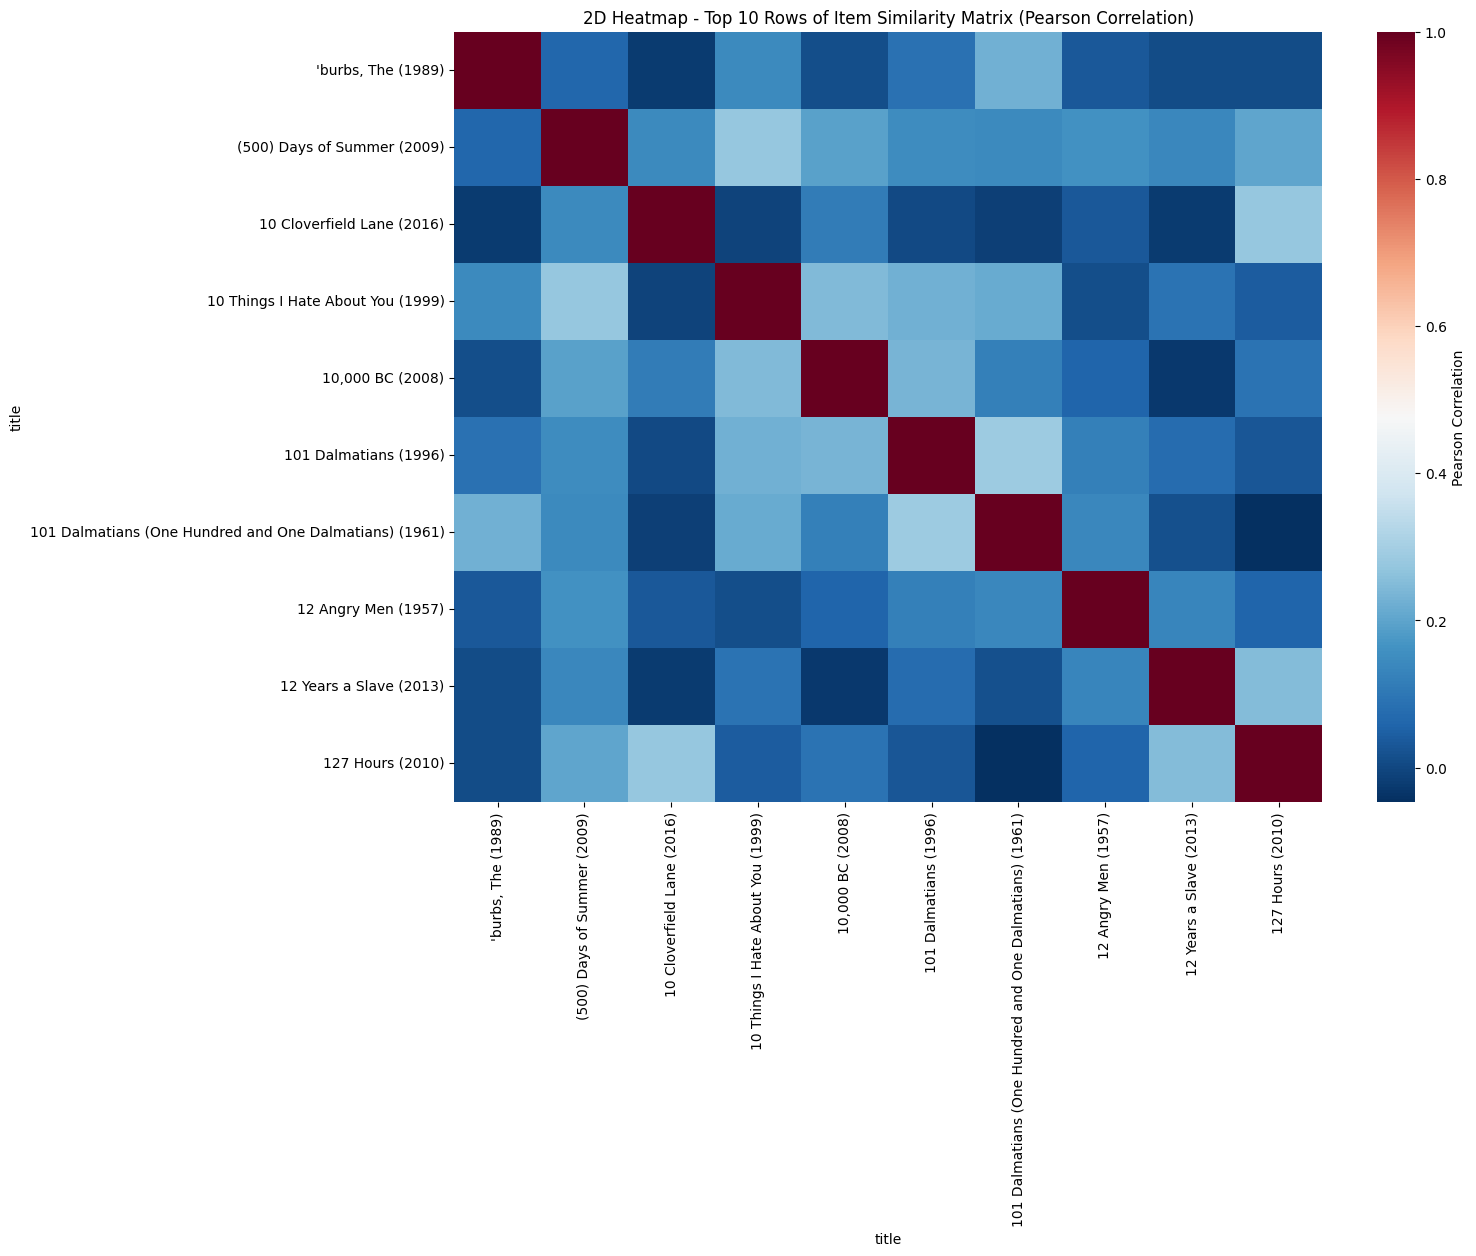

In [32]:
plt.figure(figsize=(14, 10))
sns.heatmap(item_similarity_df.iloc[:10, :].T.iloc[:10, :], cmap='RdBu_r', annot=False, cbar_kws={'label': 'Pearson Correlation'})
plt.title('2D Heatmap - Top 10 Rows of Item Similarity Matrix (Pearson Correlation)')
plt.show()

In [33]:
def get_similar_movies(movie_name, user_ratings):
    similar_score = item_similarity_df[movie_name]*(user_ratings-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score


In [34]:
action_lover = [("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)", 5),
                ("12 Years a Slave (2013)", 4),
                ("2012 (2009)", 3),
                ("(500) Days of Summer (2009)", 2)]

similar_movies = pd.DataFrame()

for movie, rating in action_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index=True)

# Display the top recommended movies for the action lover user
print("\nTop Recommended Movies for the Action Lover:")
print(similar_movies.sum().sort_values(ascending=False).head(10))


C:\Users\harsh\AppData\Local\Temp\ipykernel_26560\3579442961.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_26560\3579442961.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_26560\3579442961.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_26560\3579442961.py:9: FutureWarning: The frame.append method is deprec


Top Recommended Movies for the Action Lover:
title
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.583970
12 Years a Slave (2013)                                  1.613721
Fast and the Furious, The (2001)                         1.592233
Fast & Furious (Fast and the Furious 4, The) (2009)      1.523609
Mission: Impossible III (2006)                           1.488944
Die Another Day (2002)                                   1.465244
Crank (2006)                                             1.433465
Wanted (2008)                                            1.428856
Jumper (2008)                                            1.387260
Mummy Returns, The (2001)                                1.378540
dtype: float64


In [35]:
import pickle
filename = 'model.pkl'
with open(filename, 'wb') as model_file:
    pickle.dump(item_similarity_df, model_file)